<h2 style="text-align:center;color:#0F4C81;">
Implementing Neural Networks with Tensorflow, Keras and PyTorch
</h2>

`Keras` is a high-level API integrated into TensorFlow that simplifies the creation and training of deep learning models. It provides a user-friendly interface for building neural networks using layers, enabling quick prototyping and experimentation. Keras supports both **sequential** and **functional** models, making it versatile for various architectures, and it abstracts many low-level complexities, such as **backpropagation** and **gradient computation**. It also integrates seamlessly with TensorFlow's advanced features for performance optimization, custom layers, and distributed training.

<h4 style="color:#88B04B">Building an Image Classifier Using the Sequential API</h4>

First, we need to load a dataset. We will use Fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and a few more. Let’s load Fashion MNIST. It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out the last 5,000 images from the training set for validation:

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

When loading MNIST or Fashion MNIST using Keras rather than ScikitLearn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [2]:
type(X_train)

numpy.ndarray

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
X_train.dtype

dtype('float64')

You can plot an image using Matplotlib's `imshow()` function, with a `binary` color map:

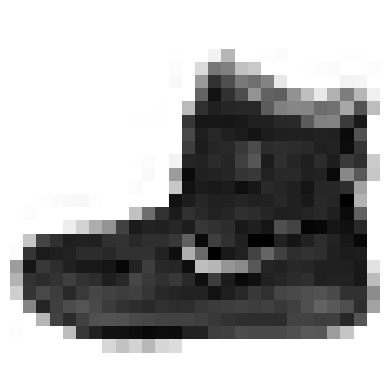

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis('off');

The labels are the class IDs (represented as uint8), from 0 to 9:

In [8]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

For example, the first image in the training set represents an ankle boot:

In [10]:
class_names[y_train[0]]

'Ankle Boot'

Here are some example samples from the Fashion MNIST dataset.

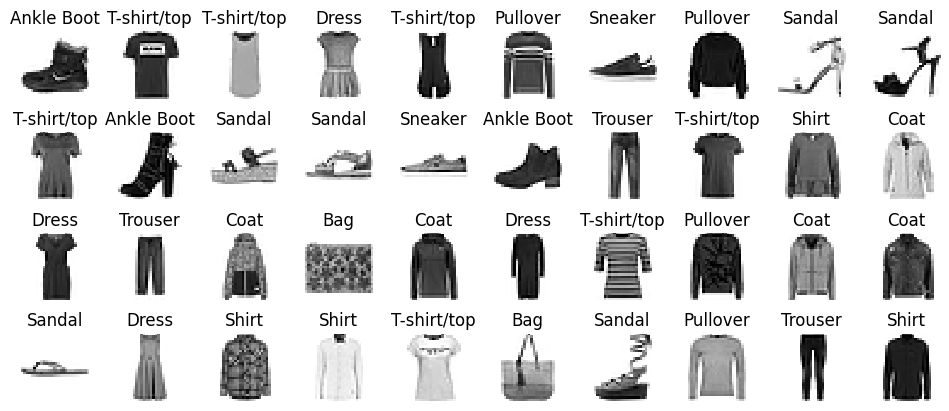

In [11]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<h4 style="color:#88B04B">Creating the model using the sequential API</h4>

Now let’s build the neural network! Here is a classification MLP with twohidden layers:

In [12]:
from tensorflow.keras import Sequential, layers

tf.random.set_seed(42)
model = Sequential()
model.add(layers.Input(shape=[28, 28]))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Step-by-Step Explanation of the Model**

1. **Setting the Seed**:
   ```python
   tf.random.set_seed(42)
   ```
   This ensures reproducibility of results by fixing the randomness used in weight initialization and other stochastic processes.

2. **Model Initialization**:
   ```python
   model = Sequential()
   ```
   The `Sequential` API creates a linear stack of layers where each layer's output is directly fed into the next layer.

3. **Input Layer**:
   ```python
   model.add(layers.Input(shape=[28, 28]))
   ```
   - **Purpose**: Specifies the input shape to the model. Here, it's a 28x28 matrix (common for images like those in the MNIST dataset).
   - **Why Needed**: It ensures the model knows the structure of the incoming data.

4. **Flatten Layer**:
   ```python
   model.add(layers.Flatten())
   ```
   - **Purpose**: Converts the 2D input (28x28 matrix) into a 1D vector of 784 elements.
   - **Why Needed**: Dense layers require 1D inputs, so this reshaping is necessary.

5. **First Dense Layer**:
   ```python
   model.add(layers.Dense(300, activation='relu'))
   ```
   - **Purpose**: A fully connected layer with 300 neurons.
   - **Activation**: ReLU (Rectified Linear Unit) is used, which outputs $\max(0, x)$. It introduces non-linearity, helping the model learn complex patterns.
   - **Why 300 Neurons**: This is a hyperparameter chosen for its capacity to represent features; it's larger to capture diverse features in the input data.

6. **Second Dense Layer**:
   ```python
   model.add(layers.Dense(100, activation='relu'))
   ```
   - **Purpose**: A hidden layer with 100 neurons.
   - **Why Needed**: Adds depth to the model, allowing it to learn more hierarchical and abstract representations of the data.

7. **Output Layer**:
   ```python
   model.add(layers.Dense(10, activation='softmax'))
   ```
   - **Purpose**: Outputs probabilities for 10 classes.
   - **Activation**: Softmax ensures that the outputs are normalized probabilities, with the sum of all outputs equaling 1.

Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. 

In [13]:
model = Sequential([
    layers.Input(shape=[28, 28]),
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the **risk of overfitting**, especially when you do not have a lot of training data. We will come back to this later.

You can easily get a model’s list of layers using the layers attribute:

In [15]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3')

<Dense name=dense_3, built=True>

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03928461,  0.01636998, -0.01459013, ...,  0.03687295,
        -0.02510564, -0.07304955],
       [-0.05394099,  0.0127892 ,  0.0571917 , ..., -0.01618246,
         0.07061373,  0.04707646],
       [-0.05078832, -0.04390518, -0.04985506, ...,  0.06752352,
         0.00478631, -0.03205782],
       ...,
       [-0.07401485, -0.05644327,  0.04579919, ...,  0.03237167,
        -0.01321027,  0.03315579],
       [ 0.0564829 ,  0.002512  ,  0.07150161, ...,  0.01666679,
        -0.02506971,  0.05169633],
       [-0.06226205,  0.03506369,  0.05982813, ..., -0.06055815,
        -0.04920241, -0.00321288]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

<h5 style="color:#88B04B">Compiling the model</h5>

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

We use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `categorical_crossentropy` loss instead. If we were doing binary classification or multilabel binary classification, then we would use the `sigmoid` activation function in the output layer instead of the `softmax` activation function, and we would use the `binary_crossentropy` loss.

<h5 style="color:#88B04B">Training and evaluating the model</h5>

Now the model is ready to be trained. For this we simply need to call its `fit()` method:

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6775 - loss: 1.0042 - val_accuracy: 0.8282 - val_loss: 0.5072
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8252 - loss: 0.5092 - val_accuracy: 0.8410 - val_loss: 0.4558
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8401 - loss: 0.4571 - val_accuracy: 0.8458 - val_loss: 0.4342
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8497 - loss: 0.4278 - val_accuracy: 0.8506 - val_loss: 0.4195
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8575 - loss: 0.4069 - val_accuracy: 0.8536 - val_loss: 0.4086
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.3902 - val_accuracy: 0.8556 - val_loss: 0.3992
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8675 - loss: 0.3760 - val_accuracy: 0.8600 - val_loss: 0.3909
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8714 - loss: 0.3638 - 

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

And that’s it! The neural network is trained. At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar. The batch size is 32 by default, and since the training set has 55,000 images, the model goes through 1,719 batches per epoch: 1,718 of size 32, and 1 of size 24. After the progress bar, you can see the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. Notice that the training loss went down, which is a good sign, and the validation accuracy reached 87% after 30 epochs. That’s slightly below the training accuracy, so there is a little bit of overfitting going on, but not a huge amount.

The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its `plot()` method, you get the learning curves.

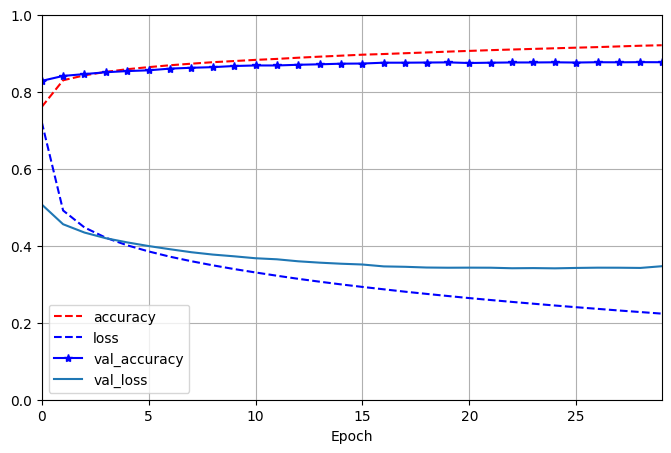

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch',
    style=['r--', 'b--', 'b-*']
)
plt.show()

Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the
`evaluate()` method.

In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.3651


[0.3653736114501953, 0.8741999864578247]

<h5 style="color:#88B04B">Using the model to make predictions</h5>

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.01, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [30]:
model.save('fashion_mnist_clf.keras')

Now you know how to use the sequential API to build, train, and evaluate a classification MLP. But what about regression?

<h4 style="color:#88B04B">Building a Regression MLP Using the Sequential API</h4>

Let’s switch back to the California housing problem and tackle it using the same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but this time building it with Keras.

Using the sequential API to build, train, evaluate, and use a regression MLP is quite similar to what we did for classification. The main differences in the following code example are the fact that the output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did. Moreover, in this example we don’t need a Flatten layer, and instead we’re using a Normalization layer as the first layer: it does the same thing as ScikitLearn’s StandardScaler, but it must be fitted to the training data using its `adapt()` method before you call the model’s `fit()` method. 

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
tf.random.set_seed(42)
norm_layer = layers.Normalization()
model = Sequential([
    layers.Input(shape=X_train.shape[1:]),
    norm_layer,
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.2050 - loss: 1.5565 - val_RootMeanSquaredError: 0.6668 - val_loss: 0.4447
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6348 - loss: 0.4035 - val_RootMeanSquaredError: 0.8453 - val_loss: 0.7145
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6050 - loss: 0.3663 - val_RootMeanSquaredError: 1.0491 - val_loss: 1.1006
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5902 - loss: 0.3485 - val_RootMeanSquaredError: 0.8862 - val_loss: 0.7854
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5792 - loss: 0.3356 - val_RootMeanSquaredError: 1.1557 - val_loss: 1.3356
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5701 - loss: 0.3251 - val_RootMeanSquaredError: 1.3472 - val_loss: 1.8150
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5654 - los

In [36]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5271 - loss: 0.2780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [37]:
y_pred

array([[0.44294345],
       [0.92248887],
       [4.910225  ]], dtype=float32)

In [38]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

As you can see, the sequential API is quite clean and straightforward. However, although Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the functional API.

<h4 style="color:#88B04B">Building Complex Models Using the Functional API</h4>

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al.⁠ It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).⁠ In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

<div style="display:flex;justify-content:center;">
<img src="images/wide_deep_nn.png" style="width:500px;object-fit:cover;" />
</div>

Let’s build such a neural network to tackle the California housing problem:

In [39]:
normalization_layer = layers.Normalization()
hidden_layer1 = layers.Dense(30, activation='relu')
hidden_layer2 = layers.Dense(30, activation='relu')
concat_layer = layers.Concatenate()
output_layer = layers.Dense(1)

In [40]:
input_ = layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

At a high level, the first five lines create all the layers we need to build the model, the next six lines use these layers just like functions to go from the input to the output, and the last line creates a Keras Model object by pointing to the input and the output.

Once you have built this Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you compile the model, adapt the Normalization layer, fit the model, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path, as illustrated below? 

<div style="display:flex;justify-content:center;">
<img src="images/handling_multiple_inputs.png" style="width:700px;object-fit:cover;" />
</div>

In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows:

In [41]:
input_wide = layers.Input(shape=[5]) # features 0 to 5
input_deep = layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = layers.Normalization()
norm_layer_deep = layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = layers.Dense(30, activation='relu')(norm_deep)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.concatenate([norm_wide, hidden2])
output = layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

There are a few things to note in this example, compared to the previous one:

- Each Dense layer is created and called on the same line. This is a common practice, as it makes the code more concise without losing clarity. However, we can’t do this with the Normalization layer since we need a reference to the layer to be able to call its `adapt()` method before fitting the model.
- We used `tf.keras.layers.concatenate()`, which creates a Concatenate layer and calls it with the given inputs.
- We specified inputs=[input_wide, input_deep] when creating the model, since there are two inputs.

**Now we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a pair of matrices (`X_train_wide`, `X_train_deep`), one per input. The same is true for `X_valid`, and also for `X_test` and `X_new` when you call `evaluate()` or `predict()`:**

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [43]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]


norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [44]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 1.4498 - loss: 2.1619 - val_RootMeanSquaredError: 1.3040 - val_loss: 1.7004
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7748 - loss: 0.6009 - val_RootMeanSquaredError: 0.7684 - val_loss: 0.5904
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6971 - loss: 0.4863 - val_RootMeanSquaredError: 0.6922 - val_loss: 0.4791
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6573 - loss: 0.4323 - val_RootMeanSquaredError: 0.6699 - val_loss: 0.4488
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6349 - loss: 0.4032 - val_RootMeanSquaredError: 0.9173 - val_loss: 0.8414
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6212 - loss: 0.3861 - val_RootMeanSquaredError: 0.7503 - val_loss: 0.5630
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6105 - los

In [45]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.5739 - loss: 0.3295


[0.3277372121810913, 0.5724833607673645]

In [46]:
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[0.39351645],
       [1.3013332 ],
       [3.437452  ]], dtype=float32)

As you can see, you can build all sorts of architectures with the functional API. Next, we’ll look at one last way you can build Keras models.

<h4 style="color:#88B04B">Using the Subclassing API to Build Dynamic Models</h4>

Both the sequential API and the functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly straightforward to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the subclassing API is for you. 

With this approach, you subclass the `Model` class, create the layers you need in the constructor, and use them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the functional API:

In [54]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [48]:
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

This example looks like the previous one, except we separate the creation of the layers⁠ in the constructor from their usage in the `call()` method. And we don’t need to create the Input objects: we can use the input argument to the `call()` method.

Now that we have a model instance, we can compile it, adapt its normalization layers (e.g., using `model.norm_layer_wide.adapt(...)` and `model.norm_layer_deep.adapt(...)`), fit it, evaluate it, and use it to make predictions, exactly like we did with the functional API.

The big difference with this API is that you can include pretty much anything you want in the `call()` method: for loops, if statements, low-level TensorFlow operations — your imagination is the limit.

This makes it a great API when experimenting with new ideas, especially for researchers. However, this extra flexibility does come at a cost: your model’s architecture is hidden within the `call()` method, so Keras cannot easily inspect it; the model cannot be cloned using `tf.keras.models.clone_model()`; and when you
call the `summary()` method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the sequential API or the functional API.

<h5 style="color:#88B04B">Saving and Restoring a Model</h5>

Saving a trained Keras model is as simple as it gets:

In [50]:
model.save('my_keras_model.keras')

c:\Python\Python3.10.11\lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to evaluate it or to make predictions. Loading the model is just as easy as saving it. 

When loading a custom model, you need to specify a custom object so TensorFlow knows how to reconstruct the model.

In [55]:
model = tf.keras.models.load_model('my_keras_model.keras', custom_objects={
    'WideAndDeepModel': WideAndDeepModel
})

You can also use `save_weights()` and `load_weights()` to save and load only the parameter values. This includes the connection weights, biases, preprocessing stats, optimizer state, etc. The parameter values are saved in one or more files such as my_weights.data-00004-of-00052, plus an index file like my_weights.index. 

Saving just the weights is faster and uses less disk space than saving the whole model, so it’s perfect to save quick checkpoints during training. If you’re training a big model, and it takes hours or days, then you must save checkpoints regularly in case the computer crashes. But how can you tell the `fit()` method to save checkpoints? Use callbacks.

<h3 style="color:#88B04B">Fashion MNIST Classification using Tensorflow</h3>

In [40]:
import tensorflow as tf
import numpy as np

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Convert dataset to float32
X_train_full = X_train_full.astype(np.float32)
X_test = X_test.astype(np.float32)

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize data
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

# Convert labels to int32
y_train, y_valid, y_test = y_train.astype(np.int32), y_valid.astype(np.int32), y_test.astype(np.int32)

In [46]:
# Define model parameters
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [47]:
# Initialize weights and biases
def init_weights(shape):
    return tf.Variable(tf.random.truncated_normal(shape, stddev=0.1), dtype=tf.float32)

def init_biases(shape):
    return tf.Variable(tf.zeros(shape), dtype=tf.float32)

In [48]:
# Define model parameters
W1 = init_weights([n_inputs, n_hidden1])
b1 = init_biases([n_hidden1])
W2 = init_weights([n_hidden1, n_hidden2])
b2 = init_biases([n_hidden2])
W3 = init_weights([n_hidden2, n_outputs])
b3 = init_biases([n_outputs])

In [49]:
# Define neural network
def neural_net(X):
    X = tf.reshape(X, [-1, n_inputs])
    hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)
    logits = tf.matmul(hidden2, W3) + b3
    return logits

# Define loss function and optimizer
def compute_loss(y_true, logits):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=logits))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [50]:
# Training loop
epochs = 10
batch_size = 64

for epoch in range(epochs):
    indices = np.random.permutation(len(X_train))
    X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        with tf.GradientTape() as tape:
            logits = neural_net(X_batch)
            loss = compute_loss(y_batch, logits)

        gradients = tape.gradient(loss, [W1,b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    val_logits = neural_net(X_valid)
    val_loss = compute_loss(y_valid, val_logits)
    print(f"Epoch {epoch + 1}: Validation Loss = {val_loss.numpy():.4f}")

Epoch 1: Validation Loss = 0.6288
Epoch 2: Validation Loss = 0.5360
Epoch 3: Validation Loss = 0.4795
Epoch 4: Validation Loss = 0.4487
Epoch 5: Validation Loss = 0.4675
Epoch 6: Validation Loss = 0.4483
Epoch 7: Validation Loss = 0.4147
Epoch 8: Validation Loss = 0.4033
Epoch 9: Validation Loss = 0.4130
Epoch 10: Validation Loss = 0.3964


In [51]:
# Evaluate on test set
test_logits = neural_net(X_test)
test_predictions = tf.argmax(test_logits, axis=1)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_predictions, y_test), tf.float32))
print(f"Test Accuracy: {test_accuracy.numpy() * 100:.2f}%")

Test Accuracy: 84.32%


<h3 style="color:#88B04B">Fashion MNIST Classification using PyTorch</h3>

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, transform=transform, download=True
)

100%|██████████| 26.4M/26.4M [00:26<00:00, 980kB/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 230kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:07<00:00, 572kB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 144kB/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [13]:
train_data, valid_data = torch.utils.data.random_split(train_dataset, [55000, 5000])

In [14]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

In [15]:
# Define the neural network model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) # No softmax because CrossEntropyLoss applies it internally
        return x

In [21]:
# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FashionMNISTModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [22]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

Epoch 1/10, Loss: 1.4720, Accuracy: 54.12%
Epoch 2/10, Loss: 0.7403, Accuracy: 73.13%
Epoch 3/10, Loss: 0.6083, Accuracy: 78.85%
Epoch 4/10, Loss: 0.5421, Accuracy: 81.17%
Epoch 5/10, Loss: 0.5061, Accuracy: 82.43%
Epoch 6/10, Loss: 0.4840, Accuracy: 83.05%
Epoch 7/10, Loss: 0.4665, Accuracy: 83.57%
Epoch 8/10, Loss: 0.4522, Accuracy: 84.12%
Epoch 9/10, Loss: 0.4410, Accuracy: 84.52%
Epoch 10/10, Loss: 0.4317, Accuracy: 84.76%


In [24]:
# Evaluate on test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 83.08%
